In [1]:
import pickle
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], ".."))
from modt.modt import MoDT
from modt._initialization import *
from modt.visualization import *
from modt.utility import *

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

In [2]:
data_input = pickle.load(open("../datasets/steel_input.pd", "rb"))
data_target = pickle.load(open("../datasets/steel_target.pd", "rb"))
parameters = {
    "X": data_input,
    "y": data_target,
    "n_experts": 4,
    "iterations": 100,
    "max_depth": 2,
    "init_learning_rate": 100,
    "learning_rate_decay": 0.995,
    "initialization_method": "random",
    "feature_names": None,
    "class_names": None,
    "use_2_dim_gate_based_on": "feature_importance_lda",
    "use_2_dim_clustering": False,
    "black_box_algorithm": None,
    "save_likelihood": True,
    }

parameters_fit = {
    "optimization_method": "ridge_regression",
    "early_stopping": False,
    "use_posterior": False,
    }

modt = MoDT(**parameters)
modt.fit(**parameters_fit)

Max depth: 2
Accuracy disjoint DTs: 0.6269963936115405
Min:  0.5625965996908809 Max:  0.6146316331787738


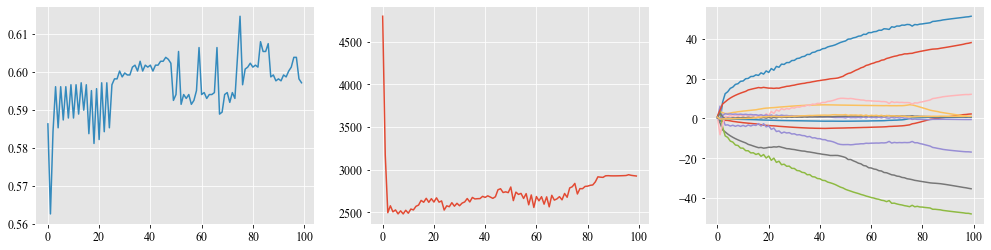

In [3]:
print("Max depth:",modt.max_depth)
print("Accuracy disjoint DTs:", modt.score_internal_disjoint())
fig = plt.gcf()
fig.set_size_inches(17,4)
plt.subplot(1, 3, 1)
accuracy_line(modt)
plt.subplot(1, 3, 2)
plt.plot(modt.all_likelihood)
plt.subplot(1, 3, 3)
theta_development(modt)

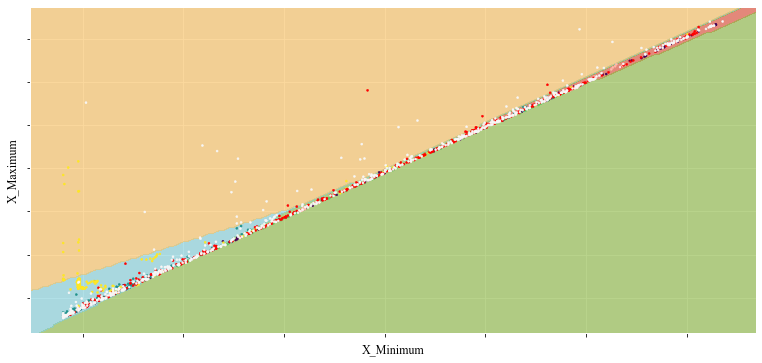

In [4]:
plt.figure(figsize=(13,6))
plot_gating(modt,iteration=modt.best_iteration,title=False,axis_digits=False,inverse_transform_standardization=False)

In [5]:
#Increase the width of Jupyter notebook s.t. we can see more
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
df = pd.DataFrame(modt.X)
df["target"] = modt.y
df["target"].nunique()

7

In [7]:
df.shape

(1941, 29)

In [8]:
#print(data_input.apply(lambda col: col.unique()))

In [9]:
df = df.sample(n=100, random_state=1)

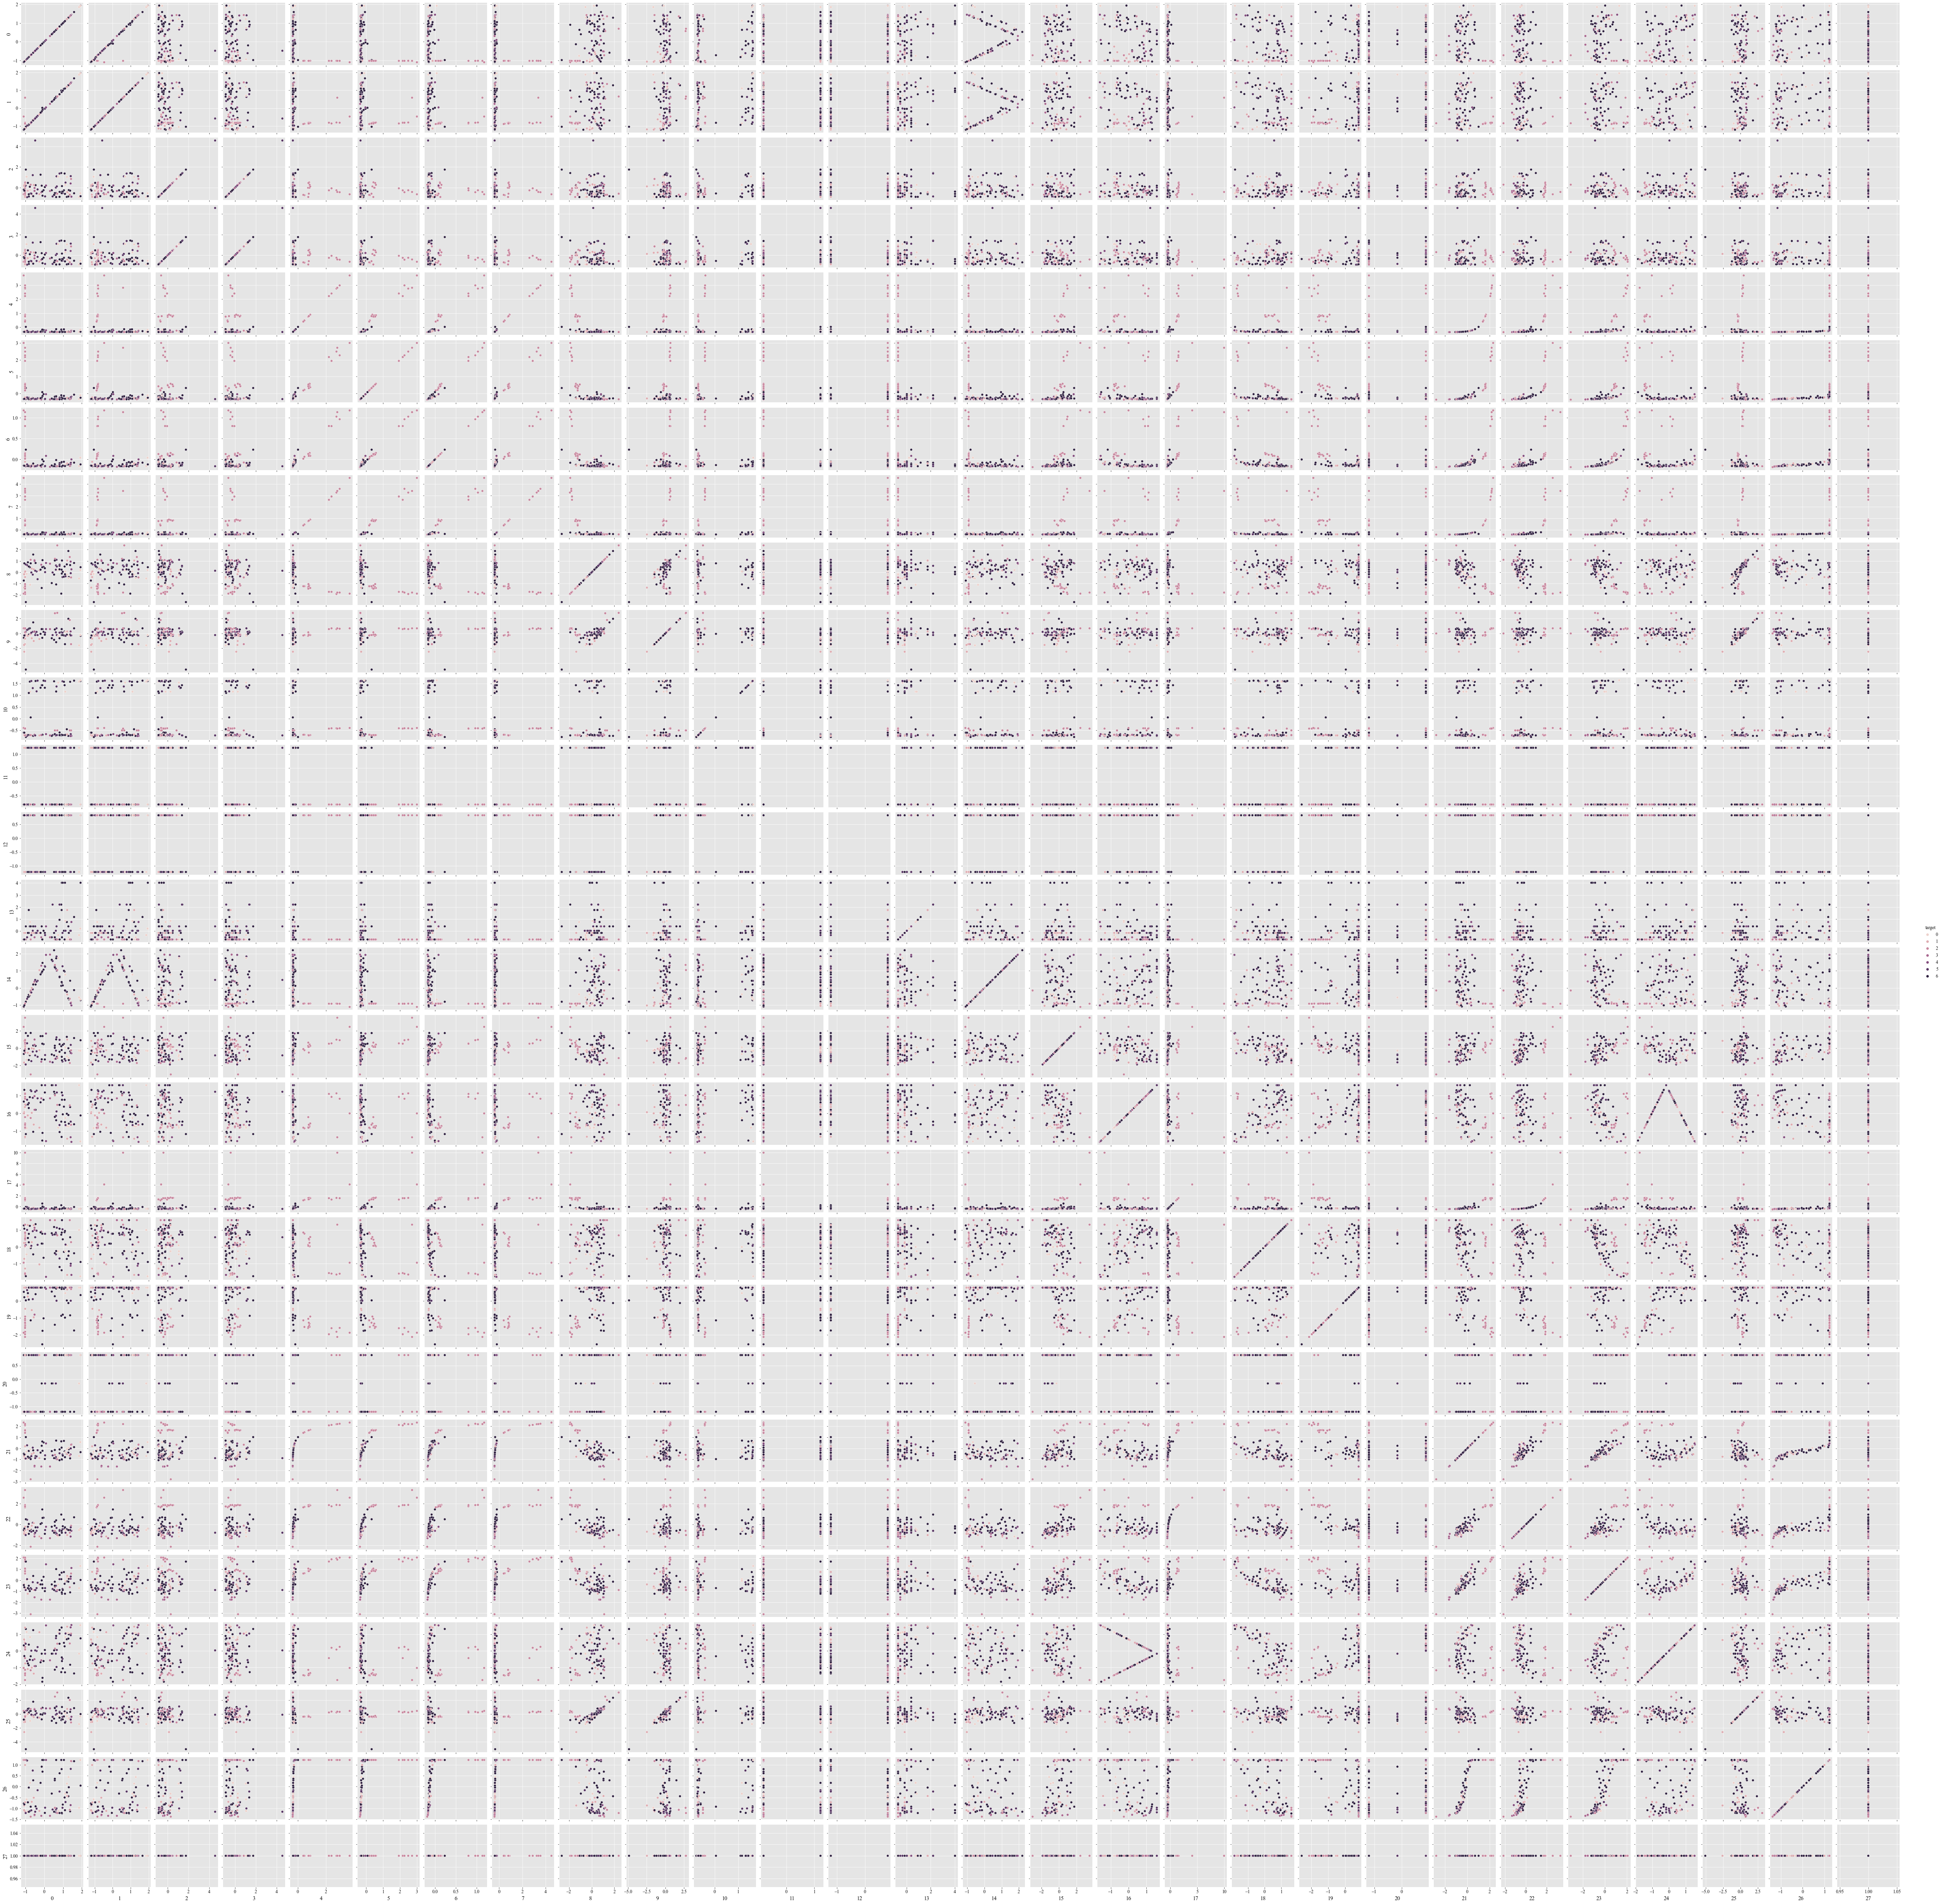

In [10]:
import seaborn as sns
#sns.set_theme(style="ticks")

sns.pairplot(df,hue="target",diag_kind=None,corner=False)

In [15]:
parameters["use_2_dim_gate_based_on"] = [22,26]

In [16]:
modt = MoDT(**parameters)
modt.fit(**parameters_fit)

Max depth: 2
Accuracy disjoint DTs: 0.657908294693457
Min:  0.5352910870685214 Max:  0.6553323029366306


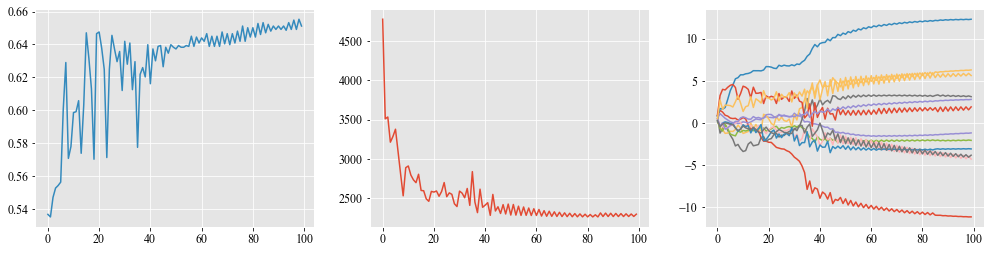

In [17]:
print("Max depth:",modt.max_depth)
print("Accuracy disjoint DTs:", modt.score_internal_disjoint())
fig = plt.gcf()
fig.set_size_inches(17,4)
plt.subplot(1, 3, 1)
accuracy_line(modt)
plt.subplot(1, 3, 2)
plt.plot(modt.all_likelihood)
plt.subplot(1, 3, 3)
theta_development(modt)

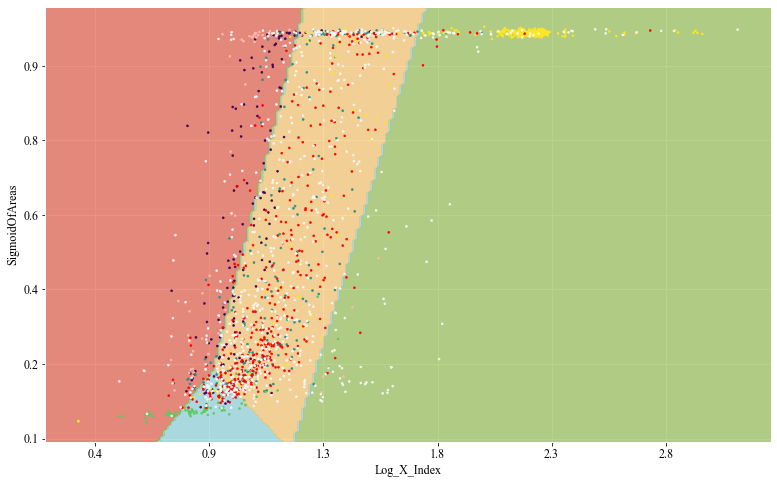

In [22]:
plt.figure(figsize=(13,8))
plot_gating(modt,iteration=modt.best_iteration,title=False,axis_digits=True,inverse_transform_standardization=True,jitter=True)